# A proof of concept for active vision models: replication of a simple conceptual framework to demonstrate how fixations can replace items in visual search tasks
One way to understand cognitive processes that contribute to vision is to use laboratory visual search tasks. Classically, such tasks required the subject to fixate one point, not moving their eyes, while passively viewing a dispaly of discrete items that can include a target and distractors. The subject is to report whether the target is present among the distractors. Often such experiments measure reaction time as a function of the number of items in the set, and the slope of this function is used as a measure of processing speed, i.e. items per second.  
While such tasks have provided crucial insights and given rise to seminal models of selective visual attention, trying to translate them to everyday life becomes problematic when we start to ask "what is an item?". It seems very unlikely that our brain constantly segments the entire natural scene before our eyes into discrete items. What, then, can take the place of items in visual search tasks, that will allow us to tractably relate behavior in controlled laboratory tasks to behavior in the real world? One possibility is the fixation. In our everyday lives, we of course do not fixate our eyes in one location while sampling the visual environment, as subject are asked to do in classical visual search tasks. Instead, we constantly move our eyes to new regions of interest where we fixate. Many researchers recognize that the constraint of not moving the eyes is very artificial, and that in general models of vision must incorporate eye movements (Finlay and Gilchrist, 2003).  
With all this in mind, Hulleman and Olivers (2017) wrote a commentary asking what can replace the item in visual search tasks, and there presented simulations using a fixation-based conceptual framework. As they state, "the implementation is formulated at a computational level (what are the outcomes) rather than an algorithmic level (what are the mechanisms; cf. Marr 1982)". The mechanisms are what I plan to address by building models using the Nengo neural simulator. Here, by replicating Hulleman and Olivers' model and results, I provide a proof-of-concept that these models have the potential to provide alternate (and perhaps more correct!) explanations for behavior seen in visual search tasks.

## The Functional Viewing Field
Below is a flowchart representing the model Hulleman and Olivers propose. The crucial concept in their model is the **Functional Viewing Field** (FVF). This parameter represents the effective perceptual resolution available to the subject, after accounting for peripheral restraints such as the acuity of the fovea, and other effects such as crowding and masking. 
![ho-model](../static/hulleman-olivers-fig2.png)  
In this high-level model, the FVF is the only free parameter, and it specified as the number of items that can be processed in a single fixation. While it may seem odd to replace "items" with a parameter that represents "some number of items that can processed", this is just a convenience used in this high-level model to easily run simulations. A more algorithm-focused model would implement constraints like crowding effects, retinal acuity, and so on. Hulleman and Olivers propose that the FVF will vary with the difficulty of the visual search task, and a quick-and-dirty proxy for this is the number of items it can encompass. They provide examples of 'easy', 'medium' and 'hard' visual search displays from Young and Hulleman 2013, which they use their model to explain. The circles drawn with dotted-lines represent their conception of the FVF.
![ho-model](../static/hulleman-olivers-fig1.png)

The model is implemented in the `fvf` package that is part of this repository.
It can be run from the command line like so:  
```console
$ fvf ./results
```
which will reproduce the results presented here, saving them in the specified results directory.

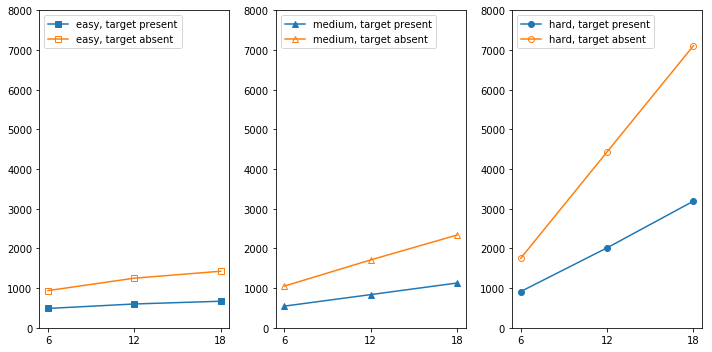

In [2]:
import fvf

rt_results = fvf.munge.munge_rt_results('../../results/reaction_times.json')
fvf.plot.mean_reaction_times(rt_results.mean_RTs_to_plot)

**Figure 1. Mean reaction times v. display size suggest the FVF-based model can explain how slopes of reaction times vary with search difficulty** As shown above, the FVF-based model produces typical reaction-time-vs-set-size curves for a visual search task. For the easy-to-search displays, slopes were almost horizontal and was similar when the target was present to when it was absent. For hard-to-search displays, the "target absent" slop is much steeper. We imagine that the subjects were allowed to move their eyes, as was the case in the actual experiments of Young Hulleman 2013.